In [4]:
import numpy as np
import tensorflow as tf
import os
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Define paths
train_dir = 'Dataset_split/train'
test_dir = 'Dataset_split/test'
val_dir = 'Dataset_split/val'

# Data generators
train_data_gen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

valid_data_gen = ImageDataGenerator(
    rescale=1 / 255.0
)

test_data_gen = ImageDataGenerator(
    rescale=1 / 255.0,
)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

valid_generator = valid_data_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32,
    shuffle=False
)

test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

Found 14000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 1 classes.


# **First Architecture**

In [6]:
def build_dnn_model(input_shape):
    model = Sequential()

    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

input_shape = (224, 224, 1)
base_model = build_dnn_model(input_shape)

base_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
base_model.summary()

log_dir = os.path.join("logs", "fit", "DNN_1")
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

base_history = base_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[tensorboard_callback]
)

# Evaluate the model
test_loss, test_acc = base_model.evaluate(valid_generator)
print(f'Test accuracy: {test_acc:.4f}')

c:\Users\tsfat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,433,025 (24.54 MB)

 Trainable params: 6,433,025 (24.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 103s 225ms/step - accuracy: 0.5737 - loss: 0.8849 - val_accuracy: 0.7723 - val_loss: 0.5019
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 97s 218ms/step - accuracy: 0.7200 - loss: 0.5569 - val_accuracy: 0.8517 - val_loss: 0.3180
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 193ms/step - accuracy: 0.8202 - loss: 0.4015 - val_accuracy: 0.9420 - val_loss: 0.1784
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 85s 191ms/step - accuracy: 0.8715 - loss: 0.3024 - val_accuracy: 0.9427 - val_loss: 0.1577
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 81s 182ms/step - accuracy: 0.8949 - loss: 0.2539 - val_accuracy: 0.9433 - val_loss: 0.1205
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 79s 178ms/step - accuracy: 0.9011 - loss: 0.2422 - val_accuracy: 0.9880 - val_loss: 0.0486
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 78s 176ms/step - accuracy: 0.9316 - loss: 0.1780 - val_accuracy: 0.9437 - val_loss: 0.1544
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 78s 177ms/step - accuracy: 0.9173 - loss: 

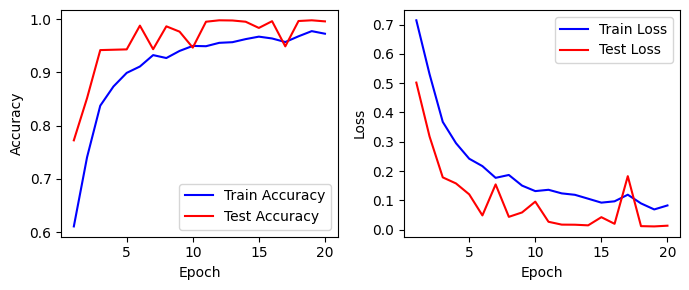

In [7]:
import matplotlib.pyplot as plt

acc = base_history.history['accuracy']
val_acc = base_history.history['val_accuracy']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(1,len(acc)+1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step
Confusion Matrix:
[[1488   12]
 [   0 1500]]


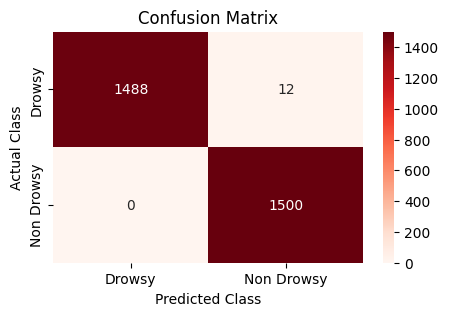


Classification Report:
              precision    recall  f1-score   support

      Drowsy    1.00000   0.99200   0.99598      1500
  Non Drowsy    0.99206   1.00000   0.99602      1500

    accuracy                        0.99600      3000
   macro avg    0.99603   0.99600   0.99600      3000
weighted avg    0.99603   0.99600   0.99600      3000



In [16]:
steps_per_epoch = np.ceil(valid_generator.samples / valid_generator.batch_size).astype(int)
 
# Get predictions from the model
predictions = base_model.predict(valid_generator, steps=steps_per_epoch)
 
# Since this is a binary classification, we threshold predictions at 0.5
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
 
# Get the true classes
true_classes = valid_generator.classes
 
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_labels = list(valid_generator.class_indices.keys())
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
 
# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(valid_generator.class_indices.keys()), digits=5))

In [9]:
base_model.save('base_model_1.h5')

--------------------------------------------------------------------------------------

# **Second Architecture**

In [10]:
def build_dnn_model2(input_shape):
    model = Sequential()

    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))  
    model.add(Dense(8, activation='relu'))   
    model.add(Dense(1, activation='sigmoid'))

    return model

input_shape = (224, 224, 1)
base_model_2 = build_dnn_model2(input_shape)

base_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
base_model_2.summary()

log_dir = os.path.join("logs", "fit", "DNN_2")
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

base_history_2 = base_model_2.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[tensorboard_callback]
)

# Evaluate the model
test_loss, test_acc = base_model_2.evaluate(valid_generator)
print(f'validation accuracy: {test_acc:.4f}')

c:\Users\tsfat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,433,665 (24.54 MB)

 Trainable params: 6,433,665 (24.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.5684 - loss: 1.0682 - val_accuracy: 0.7133 - val_loss: 0.5626
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.6783 - loss: 0.6088 - val_accuracy: 0.7893 - val_loss: 0.3968
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 192ms/step - accuracy: 0.7787 - loss: 0.4689 - val_accuracy: 0.9130 - val_loss: 0.2128
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.8410 - loss: 0.3653 - val_accuracy: 0.9420 - val_loss: 0.1526
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 199ms/step - accuracy: 0.8755 - loss: 0.2930 - val_accuracy: 0.9480 - val_loss: 0.1540
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 94s 204ms/step - accuracy: 0.8862 - loss: 0.2748 - val_accuracy: 0.9907 - val_loss: 0.0531
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.9246 - loss: 0.1959 - val_accuracy: 0.9773 - val_loss: 0.0652
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 193ms/step - accuracy: 0.9353 - loss: 0

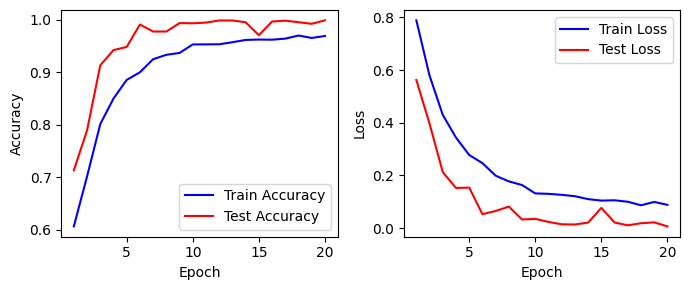

In [11]:
acc = base_history_2.history['accuracy']
val_acc = base_history_2.history['val_accuracy']
loss = base_history_2.history['loss']
val_loss = base_history_2.history['val_loss']

epochs = range(1,len(acc)+1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step
Confusion Matrix:
[[1496    4]
 [   0 1500]]


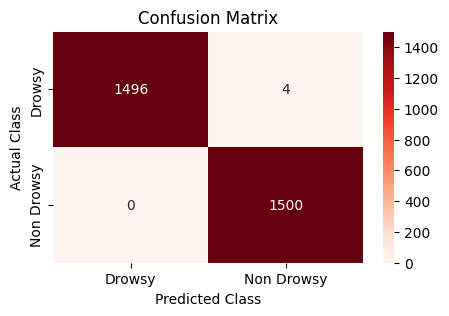


Classification Report:
              precision    recall  f1-score   support

      Drowsy    1.00000   0.99733   0.99866      1500
  Non Drowsy    0.99734   1.00000   0.99867      1500

    accuracy                        0.99867      3000
   macro avg    0.99867   0.99867   0.99867      3000
weighted avg    0.99867   0.99867   0.99867      3000



In [17]:
steps_per_epoch = np.ceil(valid_generator.samples / valid_generator.batch_size).astype(int)
 
# Get predictions from the model
predictions = base_model_2.predict(valid_generator, steps=steps_per_epoch)
 
# Since this is a binary classification, we threshold predictions at 0.5
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
 
# Get the true classes
true_classes = valid_generator.classes
 
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_labels = list(valid_generator.class_indices.keys())
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
 
# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(valid_generator.class_indices.keys()), digits=5))

In [13]:
base_model_2.save('base_model_2.h5')

--------------------------------------------------------------------------------------

# **Third Architecture**

In [16]:
def build_dnn_model3(input_shape):
    model = Sequential()

    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    return model

input_shape = (224, 224, 1)
base_model_3 = build_dnn_model3(input_shape)

base_model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
base_model_3.summary()

log_dir = os.path.join("logs", "fit", "DNN_3")
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

base_history_3 = base_model_3.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[tensorboard_callback]
)

# Evaluate the model
test_loss, test_acc = base_model_3.evaluate(valid_generator)
print(f'validation accuracy: {test_acc:.4f}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,894,849 (49.19 MB)

 Trainable params: 12,894,849 (49.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.5587 - loss: 0.8971 - val_accuracy: 0.7373 - val_loss: 0.5241
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.7186 - loss: 0.5485 - val_accuracy: 0.7990 - val_loss: 0.4425
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.8193 - loss: 0.3881 - val_accuracy: 0.8953 - val_loss: 0.2514
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 97s 218ms/step - accuracy: 0.8659 - loss: 0.2946 - val_accuracy: 0.9520 - val_loss: 0.1287
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 99s 219ms/step - accuracy: 0.9018 - loss: 0.2401 - val_accuracy: 0.9897 - val_loss: 0.0540
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 104s 233ms/step - accuracy: 0.9276 - loss: 0.1718 - val_accuracy: 0.9843 - val_loss: 0.0465
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 240ms/step - accuracy: 0.9411 - loss: 0.1525 - val_accuracy: 0.9917 - val_loss: 0.0347
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 104s 227ms/step - accuracy: 0.9480 - loss

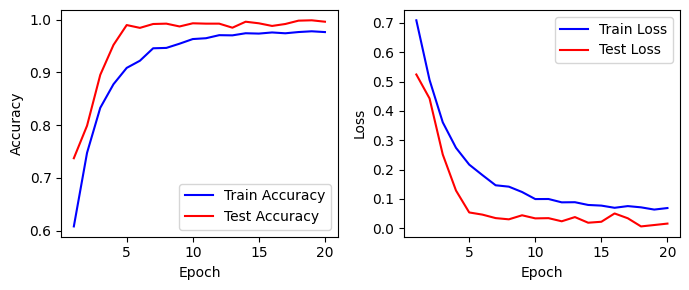

In [17]:
acc = base_history_3.history['accuracy']
val_acc = base_history_3.history['val_accuracy']
loss = base_history_3.history['loss']
val_loss = base_history_3.history['val_loss']

epochs = range(1,len(acc)+1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step
Confusion Matrix:
[[1496    4]
 [   8 1492]]


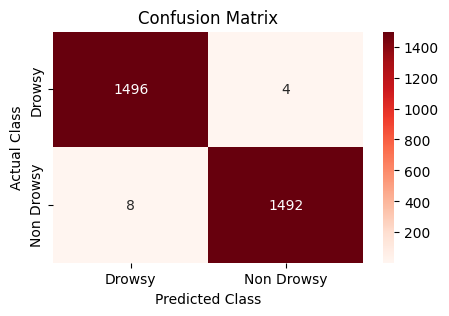


Classification Report:
              precision    recall  f1-score   support

      Drowsy    0.99468   0.99733   0.99601      1500
  Non Drowsy    0.99733   0.99467   0.99599      1500

    accuracy                        0.99600      3000
   macro avg    0.99600   0.99600   0.99600      3000
weighted avg    0.99600   0.99600   0.99600      3000



In [18]:
steps_per_epoch = np.ceil(valid_generator.samples / valid_generator.batch_size).astype(int)
 
# Get predictions from the model
predictions = base_model_3.predict(valid_generator, steps=steps_per_epoch)
 
# Since this is a binary classification, we threshold predictions at 0.5
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
 
# Get the true classes
true_classes = valid_generator.classes
 
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_labels = list(valid_generator.class_indices.keys())
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
 
# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(valid_generator.class_indices.keys()), digits=5))

In [20]:
base_model_3.save('base_model_3.h5')

--------------------------------------------------------------------------------------

# **Hyperparameter Tuning**

In [25]:
import optuna

def build_best_model(trial):
    # Define hyperparameters to tune
    num_nuerons1 = trial.suggest_categorical('num_nuerons1', [128, 246])
    num_neurons2 = trial.suggest_categorical('num_neurons2', [64, 128, 246])
    num_neurons3 = trial.suggest_categorical('num_neurons3', [32, 64])
    num_neurons4 = trial.suggest_categorical('num_neurons4', [16, 32, 64])
    num_neurons5 = trial.suggest_categorical('num_neurons5', [8, 16])
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    model = Sequential()

    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(num_nuerons1, activation='relu'))
    model.add(Dense(num_neurons2, activation='relu'))
    model.add(Dense(num_neurons3, activation='relu'))
    model.add(Dense(num_neurons4, activation='relu'))  
    model.add(Dense(num_neurons5, activation='relu'))  

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

def objective(trial):
    best_model = build_best_model(trial)

    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 96, 128])
    epochs = trial.suggest_categorical('epochs', [10, 20, 30, 40, 50])

    log_dir = os.path.join("logs", "tuning")
    os.makedirs(log_dir, exist_ok=True)
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = best_model.fit(
        train_generator,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=valid_generator,
        callbacks=[tensorboard_callback, early_stopping]
    )

    val_accuracy = np.mean(history.history['val_accuracy'])
    return val_accuracy

In [26]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-08-11 01:38:38,228] A new study created in memory with name: no-name-852c50a5-be7e-49a4-b5fb-ac29d310b845


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 96s 214ms/step - accuracy: 0.5767 - loss: 0.8464 - val_accuracy: 0.6980 - val_loss: 0.5352
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 165ms/step - accuracy: 0.6903 - loss: 0.5796 - val_accuracy: 0.8133 - val_loss: 0.4126
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - accuracy: 0.7528 - loss: 0.4991 - val_accuracy: 0.8710 - val_loss: 0.2882
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.8365 - loss: 0.3536 - val_accuracy: 0.9453 - val_loss: 0.1300
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 69s 157ms/step - accuracy: 0.8880 - loss: 0.2593 - val_accuracy: 0.9310 - val_loss: 0.1603
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.9045 - loss: 0.2286 - val_accuracy: 0.9617 - val_loss: 0.0993
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - accuracy: 0.9317 - loss: 0.1788 - val_accuracy: 0.9847 - val_loss: 0.0723
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - accuracy: 0.9317 - loss: 0

[I 2024-08-11 02:10:44,475] Trial 0 finished with value: 0.9647901278954966 and parameters: {'num_nuerons1': 128, 'num_neurons2': 64, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 16, 'learning_rate': 0.001164362631381605, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 0.9647901278954966.


Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 161ms/step - accuracy: 0.5091 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.5017 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.4916 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.4921 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.4973 - loss: 0

[I 2024-08-11 02:26:05,343] Trial 1 finished with value: 0.5 and parameters: {'num_nuerons1': 128, 'num_neurons2': 128, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 8, 'learning_rate': 0.00024616000593095954, 'batch_size': 16, 'epochs': 30}. Best is trial 0 with value: 0.9647901278954966.


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 162ms/step - accuracy: 0.5694 - loss: 0.7952 - val_accuracy: 0.7907 - val_loss: 0.4697
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.7380 - loss: 0.5297 - val_accuracy: 0.8803 - val_loss: 0.2773
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.8188 - loss: 0.3925 - val_accuracy: 0.9463 - val_loss: 0.1692
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.8656 - loss: 0.3043 - val_accuracy: 0.9440 - val_loss: 0.1334
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 159ms/step - accuracy: 0.9020 - loss: 0.2319 - val_accuracy: 0.9877 - val_loss: 0.0752
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.9136 - loss: 0.2091 - val_accuracy: 0.9847 - val_loss: 0.0814
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.9398 - loss: 0.1560 - val_accuracy: 0.9647 - val_loss: 0.0716
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.9464 - loss: 0

[I 2024-08-11 02:38:00,342] Trial 2 finished with value: 0.9477999925613403 and parameters: {'num_nuerons1': 128, 'num_neurons2': 128, 'num_neurons3': 64, 'num_neurons4': 32, 'num_neurons5': 16, 'learning_rate': 0.0012193490805124938, 'batch_size': 32, 'epochs': 10}. Best is trial 0 with value: 0.9647901278954966.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 95s 206ms/step - accuracy: 0.5847 - loss: 0.7176 - val_accuracy: 0.7803 - val_loss: 0.4451
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 91s 205ms/step - accuracy: 0.7776 - loss: 0.4705 - val_accuracy: 0.9763 - val_loss: 0.1262
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.8830 - loss: 0.2780 - val_accuracy: 0.9793 - val_loss: 0.0749
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 195ms/step - accuracy: 0.9165 - loss: 0.2060 - val_accuracy: 0.9943 - val_loss: 0.0421
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 201ms/step - accuracy: 0.9383 - loss: 0.1580 - val_accuracy: 0.9850 - val_loss: 0.0478
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 203ms/step - accuracy: 0.9443 - loss: 0.1489 - val_accuracy: 0.9863 - val_loss: 0.0538
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 92s 201ms/step - accuracy: 0.9623 - loss: 0.1040 - val_accuracy: 0.9900 - val_loss: 0.0284
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 195ms/step - accuracy: 0.9636 - loss: 0

[I 2024-08-11 03:19:02,938] Trial 3 finished with value: 0.9849999994039536 and parameters: {'num_nuerons1': 246, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 32, 'num_neurons5': 8, 'learning_rate': 0.00032985389158193693, 'batch_size': 16, 'epochs': 50}. Best is trial 3 with value: 0.9849999994039536.


Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 196ms/step - accuracy: 0.5393 - loss: 2.6922 - val_accuracy: 0.6560 - val_loss: 0.6233
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.6125 - loss: 0.6506 - val_accuracy: 0.6073 - val_loss: 0.6358
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 198ms/step - accuracy: 0.6861 - loss: 0.6035 - val_accuracy: 0.7630 - val_loss: 0.5079
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.7093 - loss: 0.5684 - val_accuracy: 0.7617 - val_loss: 0.4699
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.7598 - loss: 0.5042 - val_accuracy: 0.7953 - val_loss: 0.4000
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.7866 - loss: 0.4623 - val_accuracy: 0.8697 - val_loss: 0.2908
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 201ms/step - accuracy: 0.7943 - loss: 0.4586 - val_accuracy: 0.7537 - val_loss: 0.5021
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 200ms/step - accuracy: 0.8081 - loss: 0

[I 2024-08-11 03:49:59,073] Trial 4 finished with value: 0.8691587334587461 and parameters: {'num_nuerons1': 246, 'num_neurons2': 128, 'num_neurons3': 32, 'num_neurons4': 32, 'num_neurons5': 8, 'learning_rate': 0.004672826546166696, 'batch_size': 128, 'epochs': 40}. Best is trial 3 with value: 0.9849999994039536.


Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.5880 - loss: 0.6864 - val_accuracy: 0.7993 - val_loss: 0.4716
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 198ms/step - accuracy: 0.7325 - loss: 0.5378 - val_accuracy: 0.7493 - val_loss: 0.4372
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.8155 - loss: 0.4016 - val_accuracy: 0.9720 - val_loss: 0.1353
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 196ms/step - accuracy: 0.8798 - loss: 0.2749 - val_accuracy: 0.9680 - val_loss: 0.0970
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 195ms/step - accuracy: 0.9132 - loss: 0.2148 - val_accuracy: 0.9863 - val_loss: 0.0618
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 194ms/step - accuracy: 0.9314 - loss: 0.1701 - val_accuracy: 0.9853 - val_loss: 0.0584
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 203ms/step - accuracy: 0.9434 - loss: 0.1507 - val_accuracy: 0.9923 - val_loss: 0.0459
Epoch 8/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 91s 200ms/step - accuracy: 0.9503 - loss: 0

[I 2024-08-11 04:33:53,989] Trial 5 finished with value: 0.9788888851801555 and parameters: {'num_nuerons1': 246, 'num_neurons2': 64, 'num_neurons3': 64, 'num_neurons4': 16, 'num_neurons5': 16, 'learning_rate': 0.0002584241050228403, 'batch_size': 64, 'epochs': 30}. Best is trial 3 with value: 0.9849999994039536.


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.6059 - loss: 0.6901 - val_accuracy: 0.8400 - val_loss: 0.3819
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 196ms/step - accuracy: 0.7751 - loss: 0.4720 - val_accuracy: 0.9590 - val_loss: 0.1908
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.8615 - loss: 0.3220 - val_accuracy: 0.9460 - val_loss: 0.1707
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 93s 210ms/step - accuracy: 0.8996 - loss: 0.2457 - val_accuracy: 0.9863 - val_loss: 0.0678
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.9316 - loss: 0.1773 - val_accuracy: 0.9833 - val_loss: 0.0523
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 200ms/step - accuracy: 0.9320 - loss: 0.1760 - val_accuracy: 0.9930 - val_loss: 0.0277
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 195ms/step - accuracy: 0.9476 - loss: 0.1446 - val_accuracy: 0.9933 - val_loss: 0.0242
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.9563 - loss: 0

[I 2024-08-11 04:48:44,649] Trial 6 finished with value: 0.9679999887943268 and parameters: {'num_nuerons1': 246, 'num_neurons2': 128, 'num_neurons3': 64, 'num_neurons4': 16, 'num_neurons5': 8, 'learning_rate': 0.00027357264470258296, 'batch_size': 128, 'epochs': 10}. Best is trial 3 with value: 0.9849999994039536.


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.5037 - loss: 3.0000 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.4951 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 201ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 198ms/step - accuracy: 0.4904 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 196ms/step - accuracy: 0.5025 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 86s 194ms/step - accuracy: 0.5037 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


[I 2024-08-11 04:59:02,474] Trial 7 finished with value: 0.5 and parameters: {'num_nuerons1': 246, 'num_neurons2': 128, 'num_neurons3': 64, 'num_neurons4': 16, 'num_neurons5': 16, 'learning_rate': 0.005242090554325369, 'batch_size': 128, 'epochs': 20}. Best is trial 3 with value: 0.9849999994039536.


Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 160ms/step - accuracy: 0.5612 - loss: 0.7116 - val_accuracy: 0.7633 - val_loss: 0.5459
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 163ms/step - accuracy: 0.6712 - loss: 0.6063 - val_accuracy: 0.7483 - val_loss: 0.5155
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.7654 - loss: 0.4883 - val_accuracy: 0.9223 - val_loss: 0.2421
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 166ms/step - accuracy: 0.8537 - loss: 0.3320 - val_accuracy: 0.9637 - val_loss: 0.1320
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.8941 - loss: 0.2418 - val_accuracy: 0.9740 - val_loss: 0.0807
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - accuracy: 0.9094 - loss: 0.2161 - val_accuracy: 0.9860 - val_loss: 0.0497
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 69s 155ms/step - accuracy: 0.9397 - loss: 0.1563 - val_accuracy: 0.9933 - val_loss: 0.0345
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 67s 151ms/step - accuracy: 0.9497 - loss: 0

[I 2024-08-11 05:28:02,658] Trial 8 finished with value: 0.9702400040626525 and parameters: {'num_nuerons1': 128, 'num_neurons2': 128, 'num_neurons3': 64, 'num_neurons4': 32, 'num_neurons5': 16, 'learning_rate': 0.0008894575858305316, 'batch_size': 16, 'epochs': 40}. Best is trial 3 with value: 0.9849999994039536.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 158ms/step - accuracy: 0.6109 - loss: 0.6469 - val_accuracy: 0.8610 - val_loss: 0.3553
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.8066 - loss: 0.4129 - val_accuracy: 0.9653 - val_loss: 0.1408
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.8746 - loss: 0.2844 - val_accuracy: 0.9520 - val_loss: 0.1287
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.9095 - loss: 0.2196 - val_accuracy: 0.9827 - val_loss: 0.0566
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 159ms/step - accuracy: 0.9284 - loss: 0.1778 - val_accuracy: 0.9790 - val_loss: 0.0489
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - accuracy: 0.9365 - loss: 0.1604 - val_accuracy: 0.9963 - val_loss: 0.0231
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.9548 - loss: 0.1186 - val_accuracy: 0.9880 - val_loss: 0.0335
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - accuracy: 0.9580 - loss: 0

[I 2024-08-11 05:53:53,945] Trial 9 finished with value: 0.9859545474702661 and parameters: {'num_nuerons1': 128, 'num_neurons2': 128, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 16, 'learning_rate': 0.0004239862688418301, 'batch_size': 16, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 79s 173ms/step - accuracy: 0.5881 - loss: 0.6577 - val_accuracy: 0.8300 - val_loss: 0.4469
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.7607 - loss: 0.5029 - val_accuracy: 0.8607 - val_loss: 0.3092
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 163ms/step - accuracy: 0.8396 - loss: 0.3648 - val_accuracy: 0.9057 - val_loss: 0.2247
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 163ms/step - accuracy: 0.8770 - loss: 0.2875 - val_accuracy: 0.9590 - val_loss: 0.1180
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.9122 - loss: 0.2196 - val_accuracy: 0.9863 - val_loss: 0.0586
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 163ms/step - accuracy: 0.9389 - loss: 0.1697 - val_accuracy: 0.9707 - val_loss: 0.0858
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.9513 - loss: 0.1325 - val_accuracy: 0.9770 - val_loss: 0.0651
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.9532 - loss: 0

[I 2024-08-11 06:27:19,806] Trial 10 finished with value: 0.9795118974787849 and parameters: {'num_nuerons1': 128, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 16, 'learning_rate': 0.00010033400835420259, 'batch_size': 96, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 122s 272ms/step - accuracy: 0.5808 - loss: 0.7648 - val_accuracy: 0.7473 - val_loss: 0.5287
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 116s 250ms/step - accuracy: 0.7121 - loss: 0.5640 - val_accuracy: 0.8380 - val_loss: 0.3344
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 101s 228ms/step - accuracy: 0.8288 - loss: 0.3841 - val_accuracy: 0.9563 - val_loss: 0.1409
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 108s 242ms/step - accuracy: 0.8921 - loss: 0.2514 - val_accuracy: 0.9717 - val_loss: 0.0851
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 106s 226ms/step - accuracy: 0.9167 - loss: 0.2005 - val_accuracy: 0.9807 - val_loss: 0.0532
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 198ms/step - accuracy: 0.9358 - loss: 0.1648 - val_accuracy: 0.9867 - val_loss: 0.0340
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 196ms/step - accuracy: 0.9484 - loss: 0.1352 - val_accuracy: 0.9877 - val_loss: 0.0446
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 202ms/step - accuracy: 0.9508 - lo

[I 2024-08-11 07:21:54,787] Trial 11 finished with value: 0.9787373759529807 and parameters: {'num_nuerons1': 246, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 32, 'num_neurons5': 8, 'learning_rate': 0.0005900262797709944, 'batch_size': 16, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 238ms/step - accuracy: 0.6052 - loss: 0.6841 - val_accuracy: 0.7640 - val_loss: 0.4405
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 105s 225ms/step - accuracy: 0.7672 - loss: 0.4833 - val_accuracy: 0.8580 - val_loss: 0.2878
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 105s 237ms/step - accuracy: 0.8562 - loss: 0.3210 - val_accuracy: 0.9410 - val_loss: 0.1473
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 93s 201ms/step - accuracy: 0.9088 - loss: 0.2274 - val_accuracy: 0.9757 - val_loss: 0.0915
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 105s 237ms/step - accuracy: 0.9229 - loss: 0.1900 - val_accuracy: 0.9917 - val_loss: 0.0427
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 96s 216ms/step - accuracy: 0.9402 - loss: 0.1519 - val_accuracy: 0.9933 - val_loss: 0.0376
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 135s 303ms/step - accuracy: 0.9554 - loss: 0.1188 - val_accuracy: 0.9987 - val_loss: 0.0173
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.9611 - lo

[I 2024-08-11 08:14:19,410] Trial 12 finished with value: 0.9813333302736282 and parameters: {'num_nuerons1': 246, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 8, 'learning_rate': 0.0004580729385622671, 'batch_size': 16, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 87s 171ms/step - accuracy: 0.5887 - loss: 0.6610 - val_accuracy: 0.8190 - val_loss: 0.4301
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.7973 - loss: 0.4492 - val_accuracy: 0.8837 - val_loss: 0.2554
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 68s 153ms/step - accuracy: 0.8668 - loss: 0.3195 - val_accuracy: 0.9633 - val_loss: 0.1452
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 65s 147ms/step - accuracy: 0.9026 - loss: 0.2417 - val_accuracy: 0.9840 - val_loss: 0.0989
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 65s 146ms/step - accuracy: 0.9169 - loss: 0.2135 - val_accuracy: 0.9900 - val_loss: 0.0641
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 68s 153ms/step - accuracy: 0.9374 - loss: 0.1680 - val_accuracy: 0.9917 - val_loss: 0.0564
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 69s 157ms/step - accuracy: 0.9502 - loss: 0.1397 - val_accuracy: 0.9930 - val_loss: 0.0424
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.9513 - loss: 0

[I 2024-08-11 08:51:02,584] Trial 13 finished with value: 0.9839032292366028 and parameters: {'num_nuerons1': 128, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 8, 'learning_rate': 0.00010867811270566974, 'batch_size': 16, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 122s 272ms/step - accuracy: 0.5629 - loss: 1.4709 - val_accuracy: 0.7427 - val_loss: 0.5601
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 101s 216ms/step - accuracy: 0.6702 - loss: 0.6145 - val_accuracy: 0.8207 - val_loss: 0.4190
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 98s 221ms/step - accuracy: 0.7253 - loss: 0.5516 - val_accuracy: 0.8420 - val_loss: 0.4184
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 130s 275ms/step - accuracy: 0.7466 - loss: 0.5419 - val_accuracy: 0.8033 - val_loss: 0.4529
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 103s 226ms/step - accuracy: 0.7525 - loss: 0.5316 - val_accuracy: 0.8130 - val_loss: 0.4475
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.7516 - loss: 0.5215 - val_accuracy: 0.8377 - val_loss: 0.3927
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 95s 213ms/step - accuracy: 0.7746 - loss: 0.5023 - val_accuracy: 0.8393 - val_loss: 0.3565
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - accuracy: 0.7602 - los

[I 2024-08-11 09:21:47,364] Trial 14 finished with value: 0.8416491307710346 and parameters: {'num_nuerons1': 246, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 32, 'num_neurons5': 16, 'learning_rate': 0.0022021323744560515, 'batch_size': 96, 'epochs': 20}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 79s 173ms/step - accuracy: 0.5129 - loss: 0.7081 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 75s 168ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 67s 152ms/step - accuracy: 0.5030 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 80s 181ms/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 65s 147ms/step - accuracy: 0.4955 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 145ms/step - accuracy: 0.4998 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 144ms/step - accuracy: 0.4886 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 66s 149ms/step - accuracy: 0.5012 - loss: 0

[I 2024-08-11 09:31:09,683] Trial 15 finished with value: 0.5 and parameters: {'num_nuerons1': 128, 'num_neurons2': 64, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 8, 'learning_rate': 0.0004788289723498151, 'batch_size': 64, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 156ms/step - accuracy: 0.5765 - loss: 1.0310 - val_accuracy: 0.7340 - val_loss: 0.4759
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.7432 - loss: 0.5110 - val_accuracy: 0.8700 - val_loss: 0.3266
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 164ms/step - accuracy: 0.8089 - loss: 0.4119 - val_accuracy: 0.9233 - val_loss: 0.2070
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 164ms/step - accuracy: 0.8688 - loss: 0.3055 - val_accuracy: 0.9697 - val_loss: 0.1790
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 163ms/step - accuracy: 0.8876 - loss: 0.2714 - val_accuracy: 0.9800 - val_loss: 0.1393
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.9058 - loss: 0.2344 - val_accuracy: 0.9890 - val_loss: 0.0508
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.9204 - loss: 0.2004 - val_accuracy: 0.9783 - val_loss: 0.0705
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.9350 - loss: 0

[I 2024-08-11 09:59:49,165] Trial 16 finished with value: 0.9712916687130928 and parameters: {'num_nuerons1': 128, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 32, 'num_neurons5': 8, 'learning_rate': 0.0023501916094681866, 'batch_size': 16, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 239ms/step - accuracy: 0.6035 - loss: 0.6535 - val_accuracy: 0.8230 - val_loss: 0.4124
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.7930 - loss: 0.4467 - val_accuracy: 0.9317 - val_loss: 0.1835
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 101s 223ms/step - accuracy: 0.8663 - loss: 0.3003 - val_accuracy: 0.9630 - val_loss: 0.1205
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 237ms/step - accuracy: 0.9195 - loss: 0.2069 - val_accuracy: 0.9827 - val_loss: 0.0703
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 96s 215ms/step - accuracy: 0.9293 - loss: 0.1740 - val_accuracy: 0.9883 - val_loss: 0.0460
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.9485 - loss: 0.1323 - val_accuracy: 0.9913 - val_loss: 0.0395
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 98s 221ms/step - accuracy: 0.9581 - loss: 0.1137 - val_accuracy: 0.9967 - val_loss: 0.0320
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 99s 218ms/step - accuracy: 0.9654 - loss

[I 2024-08-11 10:35:08,572] Trial 17 finished with value: 0.9819545474919406 and parameters: {'num_nuerons1': 246, 'num_neurons2': 128, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 16, 'learning_rate': 0.0001818125081890129, 'batch_size': 16, 'epochs': 50}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 102s 205ms/step - accuracy: 0.5352 - loss: 5.6476 - val_accuracy: 0.8043 - val_loss: 0.5769
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 126s 210ms/step - accuracy: 0.6809 - loss: 0.6088 - val_accuracy: 0.7807 - val_loss: 0.4462
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 108s 229ms/step - accuracy: 0.7301 - loss: 0.5553 - val_accuracy: 0.7677 - val_loss: 0.4871
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 92s 206ms/step - accuracy: 0.6999 - loss: 0.5951 - val_accuracy: 0.7907 - val_loss: 0.4901
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 99s 220ms/step - accuracy: 0.7210 - loss: 0.5673 - val_accuracy: 0.8620 - val_loss: 0.4732
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.7278 - loss: 0.5685 - val_accuracy: 0.8577 - val_loss: 0.4282
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 99s 225ms/step - accuracy: 0.7283 - loss: 0.5669 - val_accuracy: 0.7363 - val_loss: 0.5166
Epoch 8/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 89s 199ms/step - accuracy: 0.7225 - loss

[I 2024-08-11 10:53:27,602] Trial 18 finished with value: 0.8129090775143016 and parameters: {'num_nuerons1': 246, 'num_neurons2': 246, 'num_neurons3': 32, 'num_neurons4': 32, 'num_neurons5': 16, 'learning_rate': 0.009521932884918595, 'batch_size': 16, 'epochs': 30}. Best is trial 9 with value: 0.9859545474702661.


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 88s 170ms/step - accuracy: 0.5621 - loss: 0.7170 - val_accuracy: 0.7137 - val_loss: 0.6145
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 77s 172ms/step - accuracy: 0.6426 - loss: 0.6317 - val_accuracy: 0.7483 - val_loss: 0.5472
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 157ms/step - accuracy: 0.7188 - loss: 0.5557 - val_accuracy: 0.7437 - val_loss: 0.4646
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 71s 161ms/step - accuracy: 0.7853 - loss: 0.4447 - val_accuracy: 0.9110 - val_loss: 0.2022
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 68s 153ms/step - accuracy: 0.8537 - loss: 0.3372 - val_accuracy: 0.9697 - val_loss: 0.1130
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 67s 151ms/step - accuracy: 0.9024 - loss: 0.2352 - val_accuracy: 0.9750 - val_loss: 0.0802
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 66s 148ms/step - accuracy: 0.9184 - loss: 0.1967 - val_accuracy: 0.9830 - val_loss: 0.0675
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 67s 152ms/step - accuracy: 0.9339 - loss: 0

[I 2024-08-11 11:17:07,495] Trial 19 finished with value: 0.9456333339214325 and parameters: {'num_nuerons1': 128, 'num_neurons2': 64, 'num_neurons3': 32, 'num_neurons4': 16, 'num_neurons5': 8, 'learning_rate': 0.00039817469255951066, 'batch_size': 64, 'epochs': 20}. Best is trial 9 with value: 0.9859545474702661.


In [27]:
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

Best hyperparameters: {'num_nuerons1': 128, 'num_neurons2': 128, 'num_neurons3': 32, 'num_neurons4': 64, 'num_neurons5': 16, 'learning_rate': 0.0004239862688418301, 'batch_size': 16, 'epochs': 50}
Best accuracy: 0.9859545474702661


---

# **Best Model**

In [5]:
def best_model(input_shape):
    model = Sequential()

    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))  
    model.add(Dense(16, activation='relu'))   
    model.add(Dense(1, activation='sigmoid'))

    return model

input_shape = (224, 224, 1)
best_model= best_model(input_shape)

best_model.compile(optimizer=Adam(learning_rate=0.0004), loss='binary_crossentropy', metrics=['accuracy'])
best_model.summary()

log_dir = os.path.join("logs", "fits", "Best_model")
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = best_model.fit(
    train_generator,
    epochs=50,
    batch_size=16,
    validation_data=valid_generator,
    callbacks=[tensorboard_callback, early_stopping]
)

# Evaluate the model
test_loss, test_acc = best_model.evaluate(valid_generator)
print(f'validation accuracy: {test_acc:.4f}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,446,465 (24.59 MB)

 Trainable params: 6,446,465 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 78s 173ms/step - accuracy: 0.5942 - loss: 0.6663 - val_accuracy: 0.7790 - val_loss: 0.4574
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 72s 161ms/step - accuracy: 0.7739 - loss: 0.4728 - val_accuracy: 0.9110 - val_loss: 0.2448
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.8427 - loss: 0.3483 - val_accuracy: 0.9040 - val_loss: 0.2212
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.8858 - loss: 0.2710 - val_accuracy: 0.9737 - val_loss: 0.1084
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 76s 171ms/step - accuracy: 0.9097 - loss: 0.2112 - val_accuracy: 0.9800 - val_loss: 0.0789
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 167ms/step - accuracy: 0.9231 - loss: 0.1895 - val_accuracy: 0.9767 - val_loss: 0.0664
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 167ms/step - accuracy: 0.9450 - loss: 0.1454 - val_accuracy: 0.9733 - val_loss: 0.0761
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 167ms/step - accuracy: 0.9473 - loss: 0

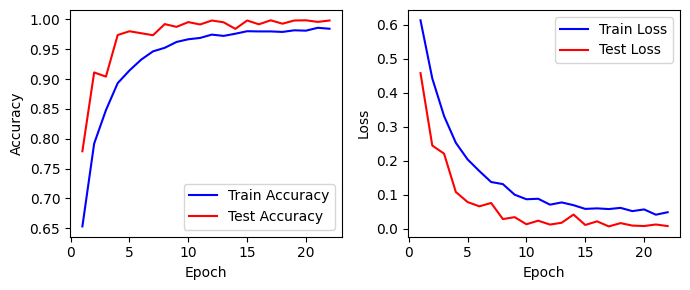

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step
Confusion Matrix:
[[1495    5]
 [   0 1500]]


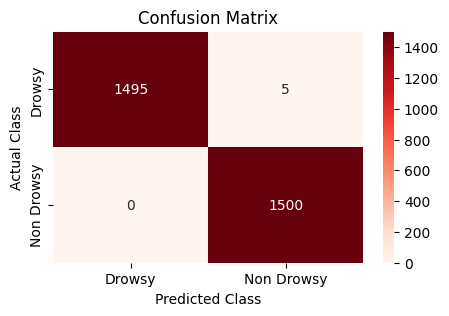


Classification Report:
              precision    recall  f1-score   support

      Drowsy    1.00000   0.99667   0.99833      1500
  Non Drowsy    0.99668   1.00000   0.99834      1500

    accuracy                        0.99833      3000
   macro avg    0.99834   0.99833   0.99833      3000
weighted avg    0.99834   0.99833   0.99833      3000



In [7]:
steps_per_epoch = np.ceil(valid_generator.samples / valid_generator.batch_size).astype(int)
 
# Get predictions from the model
predictions = best_model.predict(valid_generator, steps=steps_per_epoch)
 
# Since this is a binary classification, we threshold predictions at 0.5
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
 
# Get the true classes
true_classes = valid_generator.classes
 
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_labels = list(valid_generator.class_indices.keys())
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
 
# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(valid_generator.class_indices.keys()), digits=5))

In [8]:
best_model.save('best_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


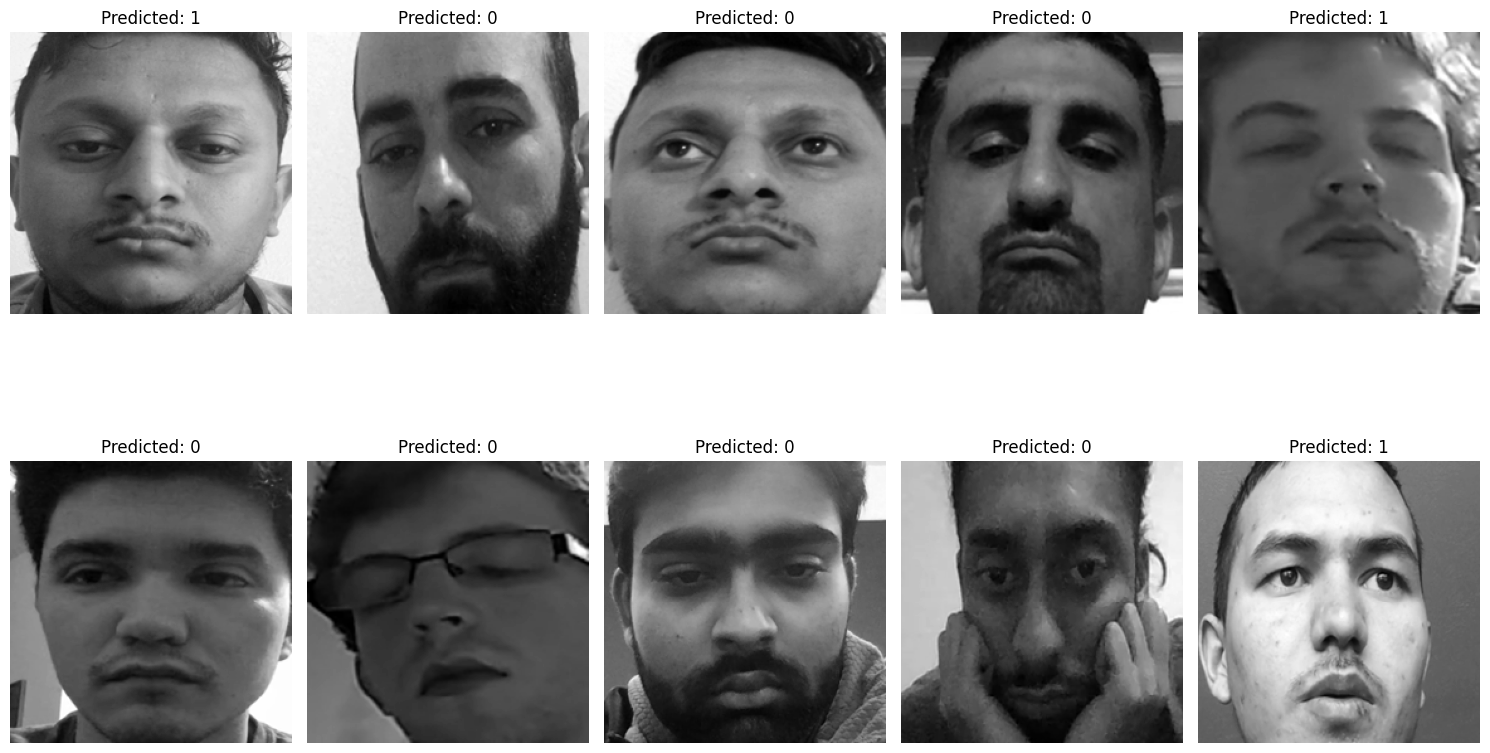

In [5]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('best_model.h5')

images, labels = next(test_generator)
first_10_images = images[:10]
 
# Make predictions
predictions = loaded_model.predict(first_10_images)
predicted_classes = np.argmax(predictions, axis=1) if test_generator.class_mode != 'binary' else (predictions > 0.5).astype('int32')
predicted_classes = predicted_classes.flatten()
 
# Display the images along with their predicted labels
plt.figure(figsize=(15, 10))
 
for i in range(len(first_10_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(first_10_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
 
plt.tight_layout()
plt.show()